## Fashion MNIST Recognition with Keras (Tensorflow)



Fashion MNIST (https://github.com/zalandoresearch/fashion-mnist
)is intended as a drop-in replacement for the classic MNIST dataset—often used as the "Hello, World" of machine learning programs for computer vision. The MNIST dataset contains images of handwritten digits (0, 1, 2, etc) in an identical format to the articles of clothing we'll use here.

We will use 60,000 images to train the network and 10,000 images to evaluate how accurately the network learned to classify images. You can access the Fashion MNIST directly from TensorFlow, just import and load the data:

In [1]:
import os
import random
import pandas as pd
import skimage.data
import skimage.transform
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import keras

# Allow image embeding in notebook
%matplotlib inline
# Tensorflow version 
print(tf.__version__)

1.12.0


Using TensorFlow backend.


### Parse and load the dataset

In [0]:
def load_data():
    fashion_mnist = keras.datasets.fashion_mnist
    (train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
    return (train_images, train_labels), (test_images, test_labels)


   ** images** :  a list of images, each image is represted by a numpy array.
   
  **labels** :  a list of labels. Integers with values between 0 and 10.


In [4]:
# Load training and testing datasets.
(train_images, train_labels), (test_images, test_labels) = load_data()

4423680/4422102 [==============================] - 1s 0us/step


### Explore the Dataset

How many images and labels does it have?

Display the first image of each label.

In [8]:
print('X: Training Size: {}'.format(train_images.shape))
print('X: Test Size:     {}'.format(test_images.shape))
print('Y: Training Size: {}'.format(train_labels.shape))
print('Y: Test Size:     {}'.format(test_labels.shape))

X: Training Size: (60000, 28, 28)
X: Test Size:     (10000, 28, 28)
Y: Training Size: (60000,)
Y: Test Size:     (10000,)


The images are 28x28 NumPy arrays, with pixel values ranging between 0 and 255. The labels are an array of integers, ranging from 0 to 9. 

## **Images Preprocessing**

Mapping images from 0-255 scale to 0-1 scale.

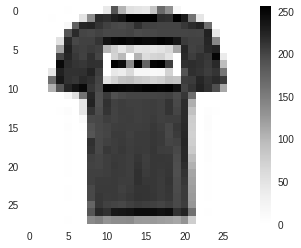

In [18]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)

In [0]:
train_images = train_images / 255.0

test_images = test_images / 255.0

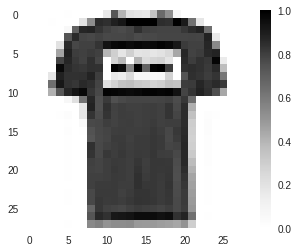

In [20]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)

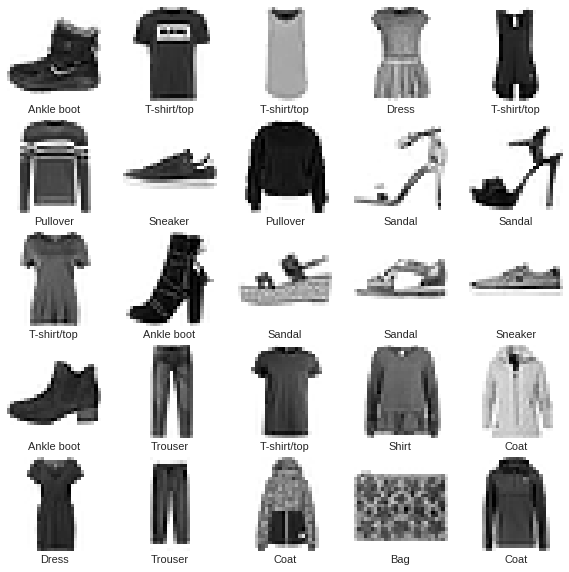

In [22]:
# Display first image of each type
def display_images_and_labels(images, labels):
  '''Inputs:
  images - an array of images
  labels - labels of each images
  imgNum - Number of first image of each label 
  Outputs:
  Displays imgNum of first image of each label'''
  #################################
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  plt.figure(figsize=(10,10))
  for i in range(25):
      plt.subplot(5,5,i+1)
      plt.xticks([])
      plt.yticks([])
      plt.grid(True)
      plt.imshow(images[i], cmap=plt.cm.binary)
      plt.xlabel(class_names[labels[i]])
####################################
display_images_and_labels(train_images, train_labels)  # call function

### Create a Model

In [0]:
# Import tensorflow libraries
from keras.models import Sequential
from keras.layers import Dropout, MaxPooling2D, Dense, Conv2D, Flatten
from keras import utils
from keras.layers.core import Activation
import sklearn.model_selection as sk

np.random.seed(10) # to maintain data indexes
numClasses = 10
inputShape = (28, 28, 1) # height,width,depth (depth = 1 for this is gray scale images)
y_train = keras.utils.to_categorical(train_labels, num_classes = numClasses)
y_test = keras.utils.to_categorical(test_labels, num_classes = numClasses)


In [41]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(units=100, activation='relu'  ))
model.add(Dropout(0.1)) 
model.add(Dense(units=100, activation='relu'  ))
model.add(Dropout(0.1))
model.add(Dense(units=100, activation='relu'  ))
model.add(Dropout(0.3))

model.add(Dense(numClasses)) # output layer
model.add(Activation("softmax")) 

model.compile(loss='binary_crossentropy', optimizer='rmsprop',metrics=['accuracy']) 
# For CNN, 'rmsprop' optimizer is observed to work better than all, using accuracy as performance evaluation matrix for dataset is almost balanced. 
# "Softmax" activation function is used in the output layer for multiclass problem.
#  "Dropout" are added to avoid overfitting of the model

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 6s 97us/step - loss: 0.1064 - acc: 0.9582 - val_loss: 0.0770 - val_acc: 0.9688
Epoch 2/100
60000/60000 [==============================] - 5s 88us/step - loss: 0.0760 - acc: 0.9700 - val_loss: 0.0725 - val_acc: 0.9722
Epoch 3/100
60000/60000 [==============================] - 5s 88us/step - loss: 0.0693 - acc: 0.9725 - val_loss: 0.0682 - val_acc: 0.9732
Epoch 4/100
60000/60000 [==============================] - 5s 89us/step - loss: 0.0652 - acc: 0.9743 - val_loss: 0.0650 - val_acc: 0.9749
Epoch 5/100
60000/60000 [==============================] - 6s 92us/step - loss: 0.0630 - acc: 0.9753 - val_loss: 0.0645 - val_acc: 0.9744
Epoch 6/100
60000/60000 [==============================] - 5s 90us/step - loss: 0.0605 - acc: 0.9765 - val_loss: 0.0675 - val_acc: 0.9742
Epoch 7/100
60000/60000 [==============================] - 5s 89us/step - loss: 0.0596 - acc: 0.9768 - val_loss: 0.0623 - 

### Training

In [42]:
callbacks = [
  # Interrupt training if `val_loss` stops improving for over 2 epochs
  tf.keras.callbacks.EarlyStopping(patience=2, monitor='val_loss'),
  # Write TensorBoard logs to `./logs` directory
  tf.keras.callbacks.TensorBoard(log_dir='./logs')
]

model.fit(train_images, y_train, batch_size=100, epochs=100, callbacks=callbacks, validation_data=(test_images, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 5s 84us/step - loss: 0.0561 - acc: 0.9785 - val_loss: 0.0639 - val_acc: 0.9760
Epoch 2/100
60000/60000 [==============================] - 5s 84us/step - loss: 0.0557 - acc: 0.9784 - val_loss: 0.0631 - val_acc: 0.9765
Epoch 3/100
60000/60000 [==============================] - 5s 84us/step - loss: 0.0553 - acc: 0.9787 - val_loss: 0.0640 - val_acc: 0.9755
Epoch 4/100
60000/60000 [==============================] - 5s 85us/step - loss: 0.0547 - acc: 0.9789 - val_loss: 0.0637 - val_acc: 0.9767


### Using the Model to make predictions

In [58]:
# your code here
y_proba = model.predict(test_images, batch_size=32) 
y_classes = y_proba.argmax(axis=-1)
# Predicted classes vs. actual classes
dummy = pd.concat([pd.DataFrame(test_labels, columns=['Actual Classes']), pd.DataFrame(y_classes, columns = ['Predicted Classes'])], axis = 1)
dummy.head()


,Actual Classes,Predicted Classes
0,9,9
1,2,2
2,1,1
3,1,1
4,6,6
